# Chapter 10, demo 2

Bayesian data analysis

Importance sampling example


In importance sampling the proposal $g(\theta)$ does not need to form an envelope over the target $q(\theta)$. When computing the expectations, draws are weighted based on the ratio of the proposal and the target.

$$
  \mathrm{E}[f(\theta)] \approx \frac{\sum_s w_s f(\theta^{(s)})}{\sum_s
      w_s}, \qquad \text{where} \quad 
     w_s =  \frac{q(\theta^{(s)})}{g(\theta^{(s)})} \qquad.
$$


In [1]:
import numpy as np
from scipy.stats import gaussian_kde
import preliz as pz

import matplotlib.pyplot as plt
pz.style.use('preliz-doc')

In [2]:
# fake interesting distribution
x = np.linspace(-3, 3, 200)
r = np.array([ 1.1 ,  1.3 , -0.1 , -0.7 ,  0.2 , -0.4 ,  0.06, -1.7 ,
               1.7 ,  0.3 ,  0.7 ,  1.6 , -2.06, -0.74,  0.2 ,  0.5 ])
# Estimate the density (named q, to emphasize that it does not need to be
# normalized). Parameter bw_method=0.48 is used to mimic the outcome of the
# kernelp function in Matlab.
q_func = gaussian_kde(r, bw_method=0.48)
q = q_func.evaluate(x)

In [3]:
# importance sampling example
dist = pz.Normal(0, 1)
g = dist.pdf(x)
w = q / g
r = np.random.randn(100)
r = r[np.abs(r) < 3] # remove samples out of the grid
wr = q_func.evaluate(r)/dist.pdf(r)

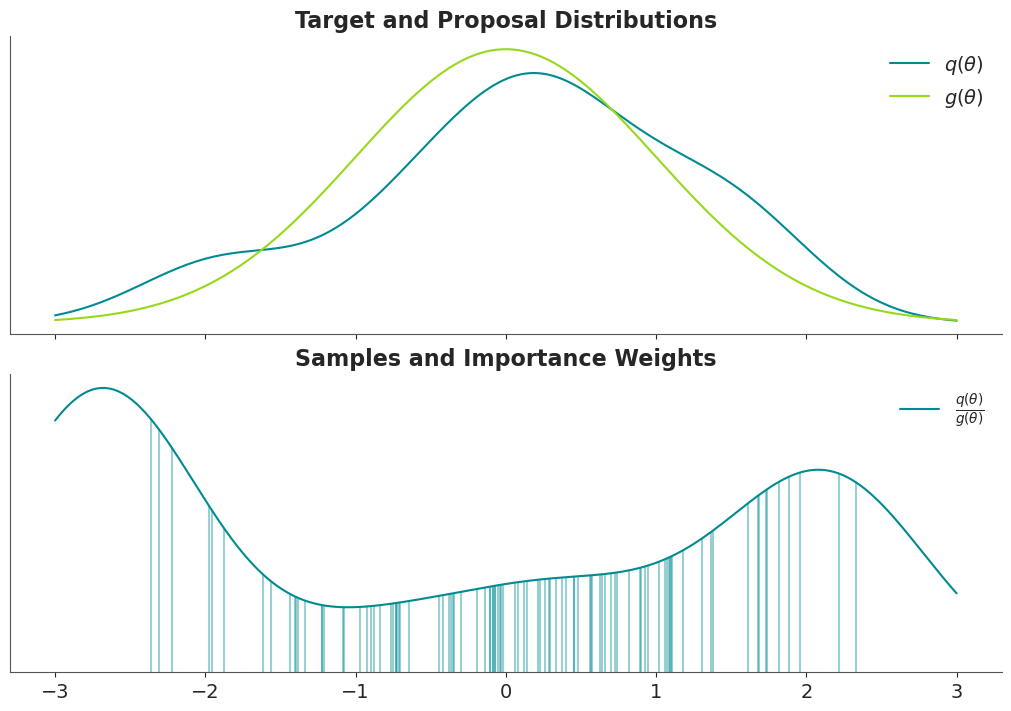

In [4]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Top plot: target and proposal
ax1.plot(x, q, label=r'$q(\theta)$')
ax1.plot(x, g, label=r'$g(\theta)$')
ax1.set(yticks=[], title='Target and Proposal Distributions')
ax1.legend()

# Bottom plot: importance weights
ax2.plot(x, w, label=r'$\frac{q(\theta)}{g(\theta)}$')
ax2.vlines(r, 0, wr, color='C0', alpha=0.4)
ax2.set(ylim=0, yticks=[], title='Samples and Importance Weights')
ax2.legend();
